In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/WCRC/data

/content/drive/MyDrive/WCRC/data


In [3]:
!pip install haversine

In [4]:
import pyproj
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from haversine import haversine
from geopy.geocoders import Nominatim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1_데이터 수집

### 가로등

In [5]:
str_light_df = pd.read_csv('가로등.csv', encoding='cp949')
str_light_df.head()

관리번호         위도          경도
0  가락지하차도-01  37.495254  127.107417
1  가락지하차도-02  37.495354  127.107755
2  가락지하차도-03  37.495443  127.108073
3  가락지하차도-04  37.495551  127.108410
4  가락지하차도-05  37.495654  127.108736

### 보안등

In [6]:
sec_light_df = pd.read_csv('보안등.csv', names='번호	보안등위치명	설치개수	소재지도로명주소	소재지지번주소	위도	경도	설치년도	설치형태	관리기관전화번호	관리기관명	데이터기준일자	경찰서명	경찰서부서명	경찰서부서코드	시도경찰청명'.split('\t'))
sec_light_df.head()

번호  보안등위치명  설치개수                소재지도로명주소             소재지지번주소         위도  \
0  10211  강일동067     1      서울특별시 강동구 아리수로93가길  서울특별시 강동구 강일동137-8  37.576006   
1  10212  강일동068     1      서울특별시 강동구 아리수로93가길  서울특별시 강동구 강일동137-3  37.576149   
2  10213  강일동069     1  서울특별시 강동구 아리수로93가길 223    서울특별시 강동구 강일동139  37.576176   
3  10214  강일동070     1      서울특별시 강동구 아리수로93가길   서울특별시 강동구 강일동26-3  37.576840   
4  10215  강일동071     1      서울특별시 강동구 아리수로93가길     서울특별시 강동구 강일동20  37.576904   

           경도  설치년도 설치형태      관리기관전화번호       관리기관명     데이터기준일자     경찰서명  \
0  127.169241   NaN  한전주  02-3425-6373  서울특별시 강동구청  2021-08-25  서울강동경찰서   
1  127.169137   NaN  한전주  02-3425-6373  서울특별시 강동구청  2021-08-25  서울강동경찰서   
2  127.168800   NaN  한전주  02-3425-6373  서울특별시 강동구청  2021-08-25  서울강동경찰서   
3  127.168722   NaN  한전주  02-3425-6373  서울특별시 강동구청  2021-08-25  서울강동경찰서   
4  127.168868   NaN  전용주  02-3425-6373  서울특별시 강동구청  2021-08-25  서울강동경찰서   

  경찰서부서명          경찰서부서코드 시도경찰청명  
0   서울강동  G30000001329742    서울청  
1   서울강동  G30000001329742    서울청  
2   서울강동  G30000001329742    서울청  
3   서울강동  G30000001329742    서울청  
4   서울강동  G30000001329742    서울청

### CCTV

In [7]:
cctv_df = pd.read_csv('cctv.csv', names='번호	자치구명	안심주소	CCTV용도	위도	경도	CCTV수량	수정일시	경찰서명	경찰서부서명	경찰서부서코드	시도경찰청명'.split('\t'))
cctv_df.head()

번호 자치구명                         안심주소 CCTV용도         위도          경도  CCTV수량  \
0   1  서초구                   양재2동 산4-14   산불감시  37.432124  127.047291       1   
1   2  금천구  시흥대로2길 8-49 주변 [시흥3동 978-6]     방범  37.434221  126.903997       1   
2   3  금천구  시흥대로2길 8-49 주변 [시흥3동 978-6]     방범  37.434303  126.903990       1   
3   4  금천구  시흥대로2길 8-49 주변 [시흥3동 978-6]     방범  37.434312  126.904080       1   
4   5  금천구  시흥대로2길 8-49 주변 [시흥3동 978-6]     방범  37.434383  126.903963       1   

         수정일시     경찰서명 경찰서부서명          경찰서부서코드 시도경찰청명  
0  2021-01-19  서울서초경찰서   서울서초  G30000001329813    서울청  
1  2022-02-23  서울금천경찰서   서울금천  G30000001332675    서울청  
2  2022-02-23  서울금천경찰서   서울금천  G30000001332675    서울청  
3  2022-02-23  서울금천경찰서   서울금천  G30000001332675    서울청  
4  2022-02-23  서울금천경찰서   서울금천  G30000001332675    서울청

### 비상벨

In [8]:
bell_df = pd.read_csv('비상벨.csv',names='번호	안전비상벨관리번호	설치목적	설치장소유형	설치위치	소재지도로명주소	소재지지번주소	WGS84위도	WGS84경도	연계방식	경찰연계유무	경비업체연계유무	관리사무소연계유무	부가기능	안전비상벨설치년도	최종점검일자	최종점검결과구분	관리기관명	관리기관전화번호	데이터기준일자	경찰서명	경찰서부서명	경찰서부서코드	시도경찰청명'.split('\t'))
bell_df.head()

번호    안전비상벨관리번호 설치목적 설치장소유형         설치위치                  소재지도로명주소  \
0  15842     화장실-024호  방범용    화장실         소망빌딩       서울특별시 강동구 성내로17길 66   
1  15843     화장실-025호  방범용    화장실         강일타워      서울특별시 강동구 아리수로93길 27   
2  15844     화장실-026호  방범용    화장실    강일 임페리얼타워      서울특별시 강동구 아리수로93길 19   
3  15845     화장실-027호  방범용    화장실         나비상가     서울특별시 강동구 천호대로157길 14   
4  16412  방범-천호2동-007  방범용    가로변  천호2동 321-79  서울특별시 강동구 천중로3길 23 (천호동)   

      소재지지번주소    WGS84위도     WGS84경도 연계방식  ... 안전비상벨설치년도      최종점검일자 최종점검결과구분  \
0         NaN  37.529757  127.130888  단방향  ...      2018  2020-12-31        Y   
1         NaN  37.565815  127.173811  단방향  ...      2019  2020-12-31        Y   
2         NaN  37.565302  127.174133  단방향  ...      2019  2020-12-31        Y   
3         NaN  37.538438  127.127228  단방향  ...      2018  2020-12-31        Y   
4  천호동 321-79  37.546640  127.124490  양방향  ...      2017  2022-01-31        Y   

  관리기관명      관리기관전화번호     데이터기준일자     경찰서명 경찰서부서명          경찰서부서코드 시도경찰청명  
0  강동구청  02-3425-5765  2022-02-28  서울강동경찰서   서울강동  G30000001329742    서울청  
1  강동구청  02-3425-5765  2022-02-28  서울강동경찰서   서울강동  G30000001329742    서울청  
2  강동구청  02-3425-5765  2022-02-28  서울강동경찰서   서울강동  G30000001329742    서울청  
3  강동구청  02-3425-5765  2022-02-28  서울강동경찰서   서울강동  G30000001329742    서울청  
4  강동구청  02-3425-5320  2022-02-22  서울강동경찰서   서울강동  G30000001329742    서울청  

[5 rows x 24 columns]

### 치안시설

In [9]:
police_df = pd.read_csv('경찰서.csv', encoding='cp949')
police_df.head()

연번  시도청   경찰서 관서명   구분          전화번호                              주소
0   1  서울청  서울중부  을지  지구대  02-2279-1908               서울특별시 중구  을지로 234
1   2  서울청  서울중부  광희  지구대  02-2233-1444             서울특별시 중구  퇴계로 375-1
2   3  서울청  서울중부  약수  지구대  02-2234-8112      서울특별시 중구  동호로 5길 15, 약수지구대
3   4  서울청  서울중부  신당  파출소  02-2252-0435  서울특별시 중구  다산로 248 (신당동, 신당파출소)
4   5  서울청  서울중부  장충  파출소  02-2274-9003               서울특별시 중구  동호로 261

### 유흥업소

In [10]:
def project_array(coord):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init="epsg:2097")
    p2 = pyproj.Proj(init="epsg:4326")
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [11]:
pub_df = pd.read_csv('단란주점.csv', encoding='cp949')
pub_df = pub_df[pub_df['상세영업상태명']=='영업'][['사업장명', '좌표정보(X)', '좌표정보(Y)', '업태구분명']]

# 좌표 변환
result = project_array(np.array(pub_df[['좌표정보(X)','좌표정보(Y)']]))
pub_df['경도'] = result[:, 0]
pub_df['위도'] = result[:, 1]
pub_df.head()

사업장명        좌표정보(X)        좌표정보(Y) 업태구분명          경도         위도
0     판도라  192332.463248  442308.045654  단란주점  126.911207  37.482931
1  왓따7080  191862.871845  456988.192685  단란주점  126.905734  37.615194
2    서담주점  190601.661796  443226.994309  단란주점  126.891627  37.491195
3    유토피아  206813.057180  456188.141055  단란주점  127.075057  37.607998
4     테크노  195024.356116  453992.743836  단란주점  126.941562  37.588228

### 숙박업소

In [12]:
accm_df = pd.read_csv('숙박업.csv', encoding='cp949')
accm_df = accm_df[accm_df['상세영업상태명']=='영업'][['사업장명', '좌표정보(X)', '좌표정보(Y)', '업태구분명']]

result = project_array(np.array(accm_df[['좌표정보(X)','좌표정보(Y)']]))
accm_df['경도'] = result[:, 0]
accm_df['위도'] = result[:, 1]
accm_df.head()

사업장명        좌표정보(X)        좌표정보(Y)    업태구분명          경도  \
0            어반스테이 명동  199345.466097  451233.369781  숙박업(생활)  126.990490   
1           오요5(oYo5)  198591.133748  450740.353160     관광호텔  126.981953   
2           더스테이클래식호텔  198037.338494  451010.546630  숙박업(생활)  126.975684   
3  오요5롯지A(oYo5LodgeA)  198602.119250  450758.364667   숙박업 기타  126.982077   
4  오요5롯지B(oYo5LodgeB)  198607.670947  450770.829936     관광호텔  126.982140   

          위도  
0  37.563380  
1  37.558937  
2  37.561371  
3  37.559100  
4  37.559212

## 2_지수화
- 위경도 1도 = 133.33 km 도로폭 4m니까 +-0.00002로해서 도로폭 지정   
- 두 노드를 잇는 직선의 방정식을 구해서 대입했을 때 +-0.00002이면 간선에 있는 것으로 간주

### 1. 노드 간 거리 계산

In [91]:
node = pd.read_csv('node5.csv')
node.head()

node        위도         경도  범죄주의구간       인접노드              도로폭
0     1  37.48863  126.92405     1.0   16!162!3      5.8!4.8!6.4
1     2  37.48887  126.92543     2.0  8!162!4!7  6.6!5.3!8.0!5.3
2     3  37.48819  126.92414     1.0      1!4!5      5.7!5.2!6.5
3     4  37.48844  126.92558     2.0      2!3!6      7.7!5.3!7.3
4     5  37.48773  126.92431     1.0     3!6!15      6.0!6.4!5.1

In [92]:
n_node = len(node)
origin_n = {n:i for i,n in enumerate(node.node)}
re_node = {i:n for i,n in enumerate(node.node)}
node['node'] = range(n_node)

In [94]:
# 간선 리스트
edge = []
for n in node['인접노드']:
  edge.append([origin_n[int(num)] for num in n.split('!')])

In [95]:
# 도로폭
hum_act = np.zeros((n_node, n_node))
for i in range(n_node):
  for j, w in zip(edge[i], node.loc[i,'도로폭'].split('!')):
    hum_act[i, j], hum_act[j, i] = w, w
hum_act

array([[0. , 0. , 5.7, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5.7, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [96]:
dist = np.zeros((n_node,n_node))
for i in range(n_node):
  for j in edge[i]:
    a, b = node.loc[i, ['위도','경도']].values, node.loc[j, ['위도','경도']].values
    d = haversine(a, b, unit = 'm')
    dist[i,j] = d

print(dist)

[[ 0.          0.         49.56604733 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [49.56604733  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [20]:
# 노드 간 개수 count 함수
def count_bet_edges(node, edge, data):
  n = len(node)
  mat = np.zeros((n,n))
  for i in range(n):
    for j in edge[i]:
      a, b = node.loc[i, ['위도','경도']].values, node.loc[j, ['위도','경도']].values
      d = haversine(a,b, unit='m')
      cnt = 0
      for lat, lng in zip(data['위도'].values, data['경도'].values):
        # 점과 직선사이의 거리로 계산
        dist = abs((b[0]-a[0])*(a[1]-lng) - (a[0]-lat)*(b[1]-a[1])) / ((b[0]-a[0])**2+(b[1]-a[1])**2)**0.5
        w = ((hum_act[i, j]+3) / 133333) / 2
        if dist <= w:
          cnt += 1
      mat[i, j], mat[j,i] = cnt/d, cnt/d
  return mat

### 밝기 지수

In [21]:
## 가로등
# 범위제한
str_light_df = str_light_df[str_light_df['위도'].between(37.4, 37.5) & str_light_df['경도'].between(126.9, 127)]
print(len(str_light_df))

# 노드 간 가로등 개수 세기
str_light = count_bet_edges(node, edge, str_light_df)
pd.DataFrame(str_light).head()

308


0    1         2         3    4    5    6    7    8    9    ...  135  136  \
0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.000000  0.061511  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.061511  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

   137  138  139       140  141  142  143  144  
0  0.0  0.0  0.0  0.091841  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.165059  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  

[5 rows x 145 columns]

In [22]:
## 보안등
# 범위제한
sec_light_df = sec_light_df[sec_light_df['위도'].between(37.48, 37.49) & sec_light_df['경도'].between(126.9, 126.94)]
print(len(sec_light_df))

# 노드 간 보안등 개수 세기
sec_light = count_bet_edges(node, edge, sec_light_df)
pd.DataFrame(sec_light).head()

3634


0         1         2         3         4         5         6    \
0  0.0000  0.000000  0.080700  0.000000  0.000000  0.000000  0.000000   
1  0.0000  0.000000  0.000000  0.161252  0.000000  0.000000  0.064996   
2  0.0807  0.000000  0.000000  0.169155  0.093802  0.000000  0.000000   
3  0.0000  0.161252  0.169155  0.000000  0.000000  0.191446  0.000000   
4  0.0000  0.000000  0.093802  0.000000  0.000000  0.127234  0.000000   

        7    8    9    ...  135  136  137  138  139       140  141  142  143  \
0  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.144321  0.0  0.0  0.0   
1  0.446509  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.330117  0.0  0.0  0.0   
2  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
3  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
4  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

   144  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 145 columns]

In [23]:
# 밝기 지수 = 노드 간의 가로등+보안등 개수
bright = str_light + sec_light
pd.DataFrame(bright).head()

0         1         2         3         4         5         6    \
0  0.0000  0.000000  0.080700  0.000000  0.000000  0.000000  0.000000   
1  0.0000  0.000000  0.000000  0.161252  0.000000  0.000000  0.064996   
2  0.0807  0.000000  0.000000  0.230666  0.093802  0.000000  0.000000   
3  0.0000  0.161252  0.230666  0.000000  0.000000  0.191446  0.000000   
4  0.0000  0.000000  0.093802  0.000000  0.000000  0.127234  0.000000   

        7    8    9    ...  135  136  137  138  139       140  141  142  143  \
0  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.236162  0.0  0.0  0.0   
1  0.446509  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.495176  0.0  0.0  0.0   
2  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
3  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
4  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

   144  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 145 columns]

### 치안환경지수

In [24]:
## cctv
# 범위제한
cctv_df = cctv_df[cctv_df['위도'].between(37.48, 37.49) & cctv_df['경도'].between(126.9, 126.94)]
print(len(cctv_df))

# 노드 간 cctv 개수 세기
cctv = count_bet_edges(node, edge, cctv_df)
pd.DataFrame(cctv).head()

1365


0         1         2         3         4         5         6    \
0  0.000000  0.000000  0.100876  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.161252  0.000000  0.000000  0.050553   
2  0.100876  0.000000  0.000000  0.084578  0.112563  0.000000  0.000000   
3  0.000000  0.161252  0.084578  0.000000  0.000000  0.153157  0.000000   
4  0.000000  0.000000  0.112563  0.000000  0.000000  0.151090  0.000000   

        7    8    9    ...  135  136  137  138  139       140  141  142  143  \
0  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.209921  0.0  0.0  0.0   
1  0.089302  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.123794  0.0  0.0  0.0   
2  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
3  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
4  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

   144  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 145 columns]

In [25]:
## 안전벨
# 범위제한
bell_df.rename(columns={'WGS84위도':'위도', 'WGS84경도':'경도'}, inplace=True)
bell_df = bell_df[bell_df['위도'].between(37.48, 37.49) & bell_df['경도'].between(126.9, 126.94)]
print(len(bell_df))

# 노드 간 bell 개수 세기
bell = count_bet_edges(node, edge, bell_df)
pd.DataFrame(bell).head()

294


0         1         2         3    4         5         6         7    8    \
0  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
1  0.0  0.000000  0.000000  0.040313  0.0  0.000000  0.007222  0.044651  0.0   
2  0.0  0.000000  0.000000  0.023067  0.0  0.000000  0.000000  0.000000  0.0   
3  0.0  0.040313  0.023067  0.000000  0.0  0.057434  0.000000  0.000000  0.0   
4  0.0  0.000000  0.000000  0.000000  0.0  0.007952  0.000000  0.000000  0.0   

   9    ...  135  136  137  138  139       140  141  142  143  144  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.039360  0.0  0.0  0.0  0.0  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.061897  0.0  0.0  0.0  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  

[5 rows x 145 columns]

In [26]:
## cctv + 안전벨
safe_fac = bell + cctv
pd.DataFrame(safe_fac).head()

0         1         2         3         4         5         6    \
0  0.000000  0.000000  0.100876  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.201565  0.000000  0.000000  0.057775   
2  0.100876  0.000000  0.000000  0.107644  0.112563  0.000000  0.000000   
3  0.000000  0.201565  0.107644  0.000000  0.000000  0.210591  0.000000   
4  0.000000  0.000000  0.112563  0.000000  0.000000  0.159042  0.000000   

        7    8    9    ...  135  136  137  138  139       140  141  142  143  \
0  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.249282  0.0  0.0  0.0   
1  0.133953  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.185691  0.0  0.0  0.0   
2  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
3  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
4  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

   144  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 145 columns]

In [27]:
## 경찰서
ind = []
police_df['주소'] = police_df['주소'].astype(str)
for i,p in enumerate(police_df['주소'].values):
  try:
    p = p.split()[1]
  except:
    p = ''
  if p == '관악구':
    ind.append(i)

len(ind)

9

In [28]:
police_df = police_df.loc[ind].reset_index(drop=True)
police_df['위도'] = [37.488202,37.478374,37.483998,37.487345,37.489284,37.474651,37.461118,37.480282,37.487317]
police_df['경도'] = [126.931378,126.957658,126.933333,126.927031,126.944768,126.977806,126.919243,126.915550,126.914231]
display(police_df.head())

police = np.zeros((n_node,n_node))
for i in range(n_node):
  for j in edge[i]:
    a, b = node.loc[i, ['위도','경도']].values, node.loc[j, ['위도','경도']].values
    m_lat, m_lng = (a[0]+b[0])/2, (a[1]+b[1])/2
    cnt = 0
    for lat, lng in zip(police_df['위도'].values, police_df['경도'].values):
      d = haversine((m_lat, m_lng), (lat, lng), unit = 'km')
      if d <= 1:
        cnt += 1
    police[i, j], police[j,i] = cnt, cnt

print('')
display(pd.DataFrame(police))

연번  시도청   경찰서  관서명   구분         전화번호                             주소  \
0  147  서울청  서울관악   당곡  지구대  02-870-0810  서울특별시 관악구  남부순환로191길 12 당곡지구대   
1  148  서울청  서울관악  낙성대  지구대  02-870-0820     서울특별시 관악구  봉천로 540, 낙성대지구대   
2  149  서울청  서울관악   신림  지구대  02-870-0830  서울특별시 관악구  남부순환로188길 12 신림지구대   
3  150  서울청  서울관악  관악산  지구대  02-870-0840      서울특별시 관악구  신림로 178 관악산지구대   
4  151  서울청  서울관악   구암  지구대  02-870-0850               서울특별시 관악구 은천로 93   

          위도          경도  
0  37.488202  126.931378  
1  37.478374  126.957658  
2  37.483998  126.933333  
3  37.487345  126.927031  
4  37.489284  126.944768

0    1    2    3    4    5    6    7    8    9    ...  135  136  137  \
0    0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  3.0  0.0  0.0  3.0  3.0  0.0  0.0  ...  0.0  0.0  0.0   
2    4.0  0.0  0.0  4.0  4.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  3.0  4.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  4.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
140  4.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
141  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
143  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
144  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     138  139  140  141  142  143  144  
0    0.0  0.0  4.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  4.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
140  0.0  4.0  0.0  0.0  0.0  0.0  0.0  
141  0.0  0.0  0.0  0.0  3.0  0.0  0.0  
142  0.0  0.0  0.0  3.0  0.0  0.0  0.0  
143  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
144  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[145 rows x 145 columns]

### 유해환경지수

In [29]:
## 단란주점
# 범위제한
pub_df = pub_df[pub_df['위도'].between(37.48, 37.49) & pub_df['경도'].between(126.9, 126.94)]
print(len(pub_df))

# 노드 간 jujeom 개수 세기
pub = count_bet_edges(node, edge, pub_df)
pd.DataFrame(pub).head()

47


0    1         2    3    4         5    6    7    8    9    ...  135  \
0  0.000000  0.0  0.020175  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
1  0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
2  0.020175  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   
3  0.000000  0.0  0.000000  0.0  0.0  0.038289  0.0  0.0  0.0  0.0  ...  0.0   
4  0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0   

   136  137  138  139       140  141  142  143  144  
0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.020632  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  

[5 rows x 145 columns]

In [30]:
## 숙박업
# 범위제한 - 호텔제외
accm_df = accm_df[accm_df['위도'].between(37.48, 37.49) & accm_df['경도'].between(126.9, 126.94)]
accm_df = accm_df[accm_df['업태구분명'].isin(['여관업','여인숙업','숙박업(생활)','숙박업 기타'])]
print(len(accm_df))

# 노드 간 숙박업 개수 세기
accm = count_bet_edges(node, edge, accm_df)
pd.DataFrame(accm).head()

71


0    1    2    3    4    5    6         7    8    9    ...  135  136  137  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.133953  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0  0.0  0.0   

   138  139  140  141  142  143  144  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 145 columns]

In [31]:
harm_env = pub + accm
pd.DataFrame(harm_env).head()

0    1         2    3    4         5    6         7    8    9    ...  \
0  0.000000  0.0  0.020175  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  ...   
1  0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.133953  0.0  0.0  ...   
2  0.020175  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  ...   
3  0.000000  0.0  0.000000  0.0  0.0  0.038289  0.0  0.000000  0.0  0.0  ...   
4  0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  ...   

   135  136  137  138  139       140  141  142  143  144  
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.020632  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  

[5 rows x 145 columns]

## 3_상관분석

In [32]:
danger = np.zeros((n_node, n_node))

for i in range(n_node):
  for j in edge[i]:
    a, b = node.loc[i, '범죄주의구간'], node.loc[j, '범죄주의구간']
    c = (a+b)/2
    danger[i, j], danger[j,i] = c, c

pd.DataFrame(danger).head()

0    1    2    3    4    5    6    7    8    9    ...  135  136  137  138  \
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  2.0  0.0  0.0  2.0  2.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  1.5  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  2.0  1.5  0.0  0.0  2.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  1.5  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   139  140  141  142  143  144  
0  0.0  1.0  0.0  0.0  0.0  0.0  
1  0.0  1.5  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 145 columns]

In [128]:
# 간선별 지수 데이터프레임 구성
origin_df = pd.DataFrame()
m = [bright, police, safe_fac, harm_env, hum_act, danger]
col = ['도로밝기지수', 'police', 'safe_fac', '유해환경지수', '인구활동지수', '범죄주의지수']
for c, mat in zip(col, m):
  value, st, ed = [], [], []
  for i in range(n_node):
    for j in edge[i]:
      value.append(mat[i,j])
      st.append(i)
      ed.append(j)
  origin_df['start'] = st
  origin_df['end'] = ed
  origin_df[c] = value

print(origin_df.shape)
origin_df.head()

(477, 8)


start  end    도로밝기지수  police  safe_fac    유해환경지수  인구활동지수  범죄주의지수
0      0   15  0.135817     4.0  0.213427  0.019402     5.8     1.0
1      0  140  0.236162     4.0  0.249282  0.000000     4.4     1.0
2      0    2  0.080700     4.0  0.100876  0.020175     5.7     1.0
3      1    7  0.446509     3.0  0.133953  0.133953     6.6     2.0
4      1  140  0.495176     4.0  0.185691  0.020632     5.3     1.5

In [129]:
origin_df['치안환경지수'] = origin_df['police'] + origin_df['safe_fac']
scaler = MinMaxScaler()
origin_df['chian_all'] = scaler.fit_transform(origin_df[['치안환경지수']])
col1 = ['도로밝기지수', '치안환경지수', '유해환경지수', '인구활동지수', '범죄주의지수']

In [130]:
origin_df[col1].describe()

도로밝기지수      치안환경지수      유해환경지수      인구활동지수      범죄주의지수
count  477.000000  477.000000  477.000000  477.000000  477.000000
mean     0.418847    3.398353    0.025599   10.281761    4.097484
std      0.459724    0.451357    0.044237   12.776310    2.030087
min      0.000000    3.000000    0.000000    0.500000    0.500000
25%      0.112318    3.071099    0.000000    4.800000    2.500000
50%      0.259170    3.191786    0.008175    5.300000    4.000000
75%      0.547412    3.594496    0.034799    7.100000    5.000000
max      3.429365    4.891982    0.376453   55.900000    9.000000

In [131]:
origin_df[col1].corr()

도로밝기지수    치안환경지수    유해환경지수    인구활동지수    범죄주의지수
도로밝기지수  1.000000  0.397771  0.444760  0.302741  0.077234
치안환경지수  0.397771  1.000000  0.121458  0.170585 -0.382954
유해환경지수  0.444760  0.121458  1.000000 -0.027860  0.132890
인구활동지수  0.302741  0.170585 -0.027860  1.000000 -0.079896
범죄주의지수  0.077234 -0.382954  0.132890 -0.079896  1.000000

In [132]:
# 이상치 제거하여 상관분석 진행
def remove_outlier(col):
  q1, q3 = col.quantile(.25), col.quantile(.75)
  iqr = q3 - q1
  min_l, max_l = q1 - 1.5*iqr, q3 + 1.5*iqr

  ind = []
  for i,c in enumerate(col):
    if min_l <= c <= max_l:
      ind.append(i)
  return ind

In [133]:
import scipy.stats

for c in col1[:-1]:
  ind = remove_outlier(origin_df[c])
  print('제거 이상치:', len(origin_df) - len(ind))
  cor_df = origin_df.loc[ind, [c,'범죄주의지수']]
  res = scipy.stats.pearsonr(cor_df[c], cor_df['범죄주의지수'])
  print(f'{c} 상관계수: {res[0]:.4f} / 유의확률: {res[1]:.4f}')

제거 이상치: 28
도로밝기지수 상관계수: 0.0414 / 유의확률: 0.3814
제거 이상치: 14
치안환경지수 상관계수: -0.3651 / 유의확률: 0.0000
제거 이상치: 34
유해환경지수 상관계수: 0.1849 / 유의확률: 0.0001
제거 이상치: 92
인구활동지수 상관계수: -0.1770 / 유의확률: 0.0005


In [134]:
# 스케일링 진행
regression_df = origin_df[['start','end']+col1].copy()
scaler = MinMaxScaler()
regression_df[col1] = scaler.fit_transform(origin_df[col1])
regression_df.head()

start  end    도로밝기지수    치안환경지수    유해환경지수    인구활동지수    범죄주의지수
0      0   15  0.039604  0.641352  0.051540  0.095668  0.058824
1      0  140  0.068865  0.660303  0.000000  0.070397  0.058824
2      0    2  0.023532  0.581864  0.053593  0.093863  0.058824
3      1    7  0.130202  0.070800  0.355828  0.110108  0.176471
4      1  140  0.144393  0.626692  0.054807  0.086643  0.117647

In [135]:
regression_df[col1].describe()

도로밝기지수      치안환경지수      유해환경지수      인구활동지수      범죄주의지수
count  477.000000  477.000000  477.000000  477.000000  477.000000
mean     0.122135    0.210548    0.068001    0.176566    0.423233
std      0.134055    0.238563    0.117510    0.230619    0.238834
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.032752    0.037579    0.000000    0.077617    0.235294
50%      0.075574    0.101368    0.021716    0.086643    0.411765
75%      0.159625    0.314218    0.092440    0.119134    0.529412
max      1.000000    1.000000    1.000000    1.000000    1.000000

## 4_회귀분석

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import *

In [49]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [42]:
x = regression_df[col1[1:-1]]
y = regression_df['범죄주의지수']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, random_state=2023)

In [44]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, pred):.4f}')
print(f'R2: {r2_score(y_test, pred):.4f}')

MAE: 0.1674
R2: 0.1682


In [45]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, pred):.4f}')
print(f'R2: {r2_score(y_test, pred):.4f}')

MAE: 0.0809
R2: 0.7092


In [46]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, pred):.4f}')
print(f'R2: {r2_score(y_test, pred):.4f}')

MAE: 0.0369
R2: 0.8150


In [47]:
xgb.feature_importances_

array([0.330766  , 0.22728571, 0.44194832], dtype=float32)

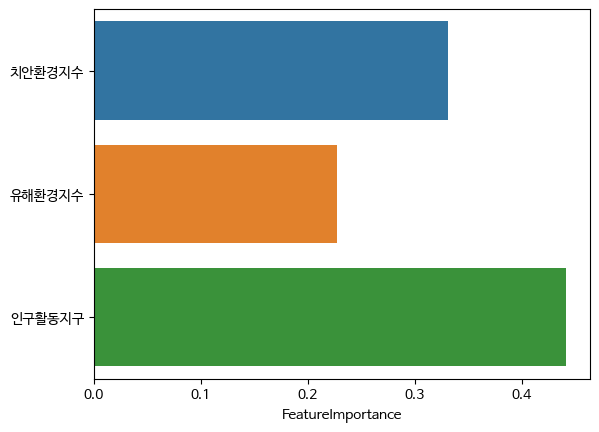

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

imp = pd.DataFrame(xgb.feature_importances_, index=x.columns, columns=['FeatureImportance'])
sns.barplot(x=imp.FeatureImportance, y=imp.index)
plt.show()

## 5_Cost Matrix

In [138]:
class CostMatrix:
  def __init__(self, param):
    self.node = param['node']
    self.edge = param['edge']
    self.data = param['data']
    self.dist = param['dist']
    self.w = param['weight']            # 가중치 = 변수 중요도
    self.corr = param['corr']           # 상관관계
    self.select = param['select']       # 사용자 선택
    self.light_w = self.get_light_w()
    self.cost_mat, self.user_mat = self.cost_matrix()

  # 일몰 일출 시간
  def get_suntime(self, date):
    key = '**'

    url = 'http://apis.data.go.kr/B090041/openapi/service/RiseSetInfoService/getLCRiseSetInfo'
    params ={'serviceKey' : key, 'locdate' : date.strftime('%Y%m%d'), 'longitude' : '3758', 'latitude' : '12443', 'dnYn' : 'N' }

    response = requests.get(url, params=params)
    suntime = pd.read_xml(response.text, xpath='//item')[['sunset', 'sunrise']]
    return suntime['sunrise'].values[0], suntime['sunset'].values[0]

  # 밝기 가중치
  def get_light_w(self):
    from datetime import timezone, timedelta, datetime
    # 현재날짜시간
    KST = timezone(timedelta(hours=9))
    time_record = datetime.now(KST)
    date = time_record.date()
    time = time_record.time()

    # 현재날짜기준 일몰/일출 시각
    sunrise, sunset = self.get_suntime(date)

    # 밝기 가중치 필요?
    t = int(time.strftime('%H%M'))
    return t > sunset or t < sunrise

  # cost matrix 계산
  def cost_matrix(self):
    times = 3
    n_node = len(self.node)
    col = ['인구활동지수', '치안환경지수', '유해환경지수', '도로밝기지수']
    if self.light_w: # 밝기 지수 사용 여부
      times = 4
    user_w = [wt*s for wt, s in zip(self.w, self.select)] # 사용자 가중치 여부

    cost_mat = np.zeros((n_node,n_node)) # 추천 가중치
    user_mat = np.zeros((n_node,n_node)) # 사용자 선호 가중치
    for i in range(times):
      c, cor, wt, u_wt = col[i], self.corr[i], self.w[i], user_w[i]
      mat = np.zeros((n_node,n_node))
      for i in range(n_node):
        for j in self.edge[i]:
          value = self.data.loc[(self.data['start']==i) & (self.data['end']==j),c]
          mat[i,j] = value if cor > 0 else 1 - value
      cost_mat += mat * wt
      user_mat += mat * u_wt
    return cost_mat, user_mat

In [254]:
w = list(xgb.feature_importances_)
corr = list(regression_df[col1[1:]].corr()['범죄주의지수'][:-1])

param = {
  'node' : node,
  'edge' : edge,
  'data' : regression_df,
  'dist' : dist,
  'weight' : w + [0.1],                                # 가중치 = 변수 중요도
  'corr' : corr + [-1] ,          # 상관관계
  'select' : (0,1,0,1)                                                               # 사용자 선택
}

In [141]:
cost = CostMatrix(param)
cost.cost_mat

array([[0.       , 0.       , 0.9478786, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.9478786, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

## 6_최단경로 알고리즘

### 0. 출발/도착점 입력받기

In [216]:
class BestPath:
  def __init__(self, node, cost):
    self.cost = cost
    self.node = node
    self.edge = self.cost.edge

  def geocoding(self, address):
    geolocoder = Nominatim(user_agent='South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    lat = geo.latitude
    lng = geo.longitude
    return lat, lng

  def get_location(self, dept, dest):
    dept_loc = self.geocoding(dept)
    dest_loc = self.geocoding(dest)
    self.loc = pd.DataFrame(columns=['node','위도','경도'])
    self.loc.loc[0] = ['start', dept_loc[0], dept_loc[1]]
    self.loc.loc[1] = ['end', dest_loc[0], dest_loc[1]]
    display(self.loc)

    self.start = self.find_nearest(dept_loc)
    self.end = self.find_nearest(dest_loc)

  def visualize(self, path=[]):
    import matplotlib.pyplot as plt
    data = self.node
    graph = self.cost.edge

    plt.figure(figsize=(7,7))
    plt.scatter(data['경도'], data['위도'], s=25, marker='o')
    plt.scatter(self.loc['경도'], self.loc['위도'], s=30, marker='^', color='red')
    for i in range(len(data)):
      plt.text(data['경도'][i], data['위도'][i], data['node'][i], fontsize=7)
    for i in range(len(self.loc)):
      plt.text(self.loc['경도'][i], self.loc['위도'][i], self.loc['node'][i], color='red', fontsize=10)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    ## 모든 노드 돌면서 엣지 표현
    visit = []
    for i, g in enumerate(graph):
      for n in g:
        if (i,n) not in visit:
          df_g = data.loc[i]
          df_n = data.loc[n]
          df = pd.concat([df_g, df_n])
          plt.plot(df["경도"], df['위도'],color='black')
          visit.append((n,i))

    # 경로 시각화
    if path:
      path = ['start'] + path + ['end']
      node_e = pd.concat([data, self.loc], axis=0)
      for j in range(len(path)-1):
        df_a = node_e.loc[node_e.node==path[j]]
        df_b = node_e.loc[node_e.node==path[j+1]]
        df = pd.concat([df_a, df_b])
        plt.plot(df['경도'],df["위도"],color='darkgreen')

    plt.grid(True)
    plt.show()

  def visualize_map(self, path):
    import branca.colormap as cm
    import folium
    cost = self.cost.cost_mat

    st, ed = self.loc.loc[0,['위도','경도']].values, self.loc.loc[1,['위도','경도']].values
    location = [st] + [self.node.loc[i, ['위도','경도']].values for i in path] + [ed]

    # 지도
    m = folium.Map(location=[37.487128, 126.926723], tiles='openstreetmap', zoom_start=17)

    if path:
      #linear
      col = [cost[path[i],p] for i,p in enumerate(path[1:])]
      linear = cm.LinearColormap(['darkgreen','yellow','red'], vmin=cost.min(), vmax=cost.max())
      col.insert(0, col[0])
      col.append(col[-1])

      # path 추가
      for i in range(len(col)):
        folium.PolyLine(locations = location[i:i+2],
                        weight = 5,
                        opacity = 0.7,
                        color = linear(col[i])).add_to(m)
      m.add_child(linear)

    # 출발도착 Marker 추가
    folium.Marker(
      location=st,
      popup="출발",
      icon=folium.Icon(icon='user', color='red'),
    ).add_to(m)

    folium.Marker(
        location=ed,
        popup="도착",
        icon=folium.Icon(icon='flag'),
    ).add_to(m)

    return m

  # 위경도 거리 변환 -> m 단위
  def count_dist(self, cord):
    dist_d = []
    for i in range(len(self.node)):
      a= self.node['위도'][i], self.node['경도'][i]
      dist_d.append(haversine(a, cord, unit = 'm'))
    return dist_d

  # 근방에 있는 노드 추출해서 방향 정하기
  def find_nearest(self, cord):
    dist = self.count_dist(cord)
    node = self.node.copy()
    node['dist'] = dist
    near = node.sort_values(by='dist').head(2)
    return near.node.values

  def DFS(self, v, e, path, weight=0):
    if v == e:
      self.weight = weight
      self.path = path
    else:
      for i in self.edge[v]:
        w = self.optimizer[i,v]
        if self.visit[i] and weight+w < self.weight:
          self.visit[i] = 0
          self.DFS(i, e, path+[i], weight+w)
          self.visit[i] = 1

  def count_weight(self):
    w,d = 0, 0
    for i, p in enumerate(self.path[1:]):
      pre = self.path[i]
      w += self.cost.cost_mat[pre, p]
      d += self.cost.dist[pre, p]
    return w, d

  def shortest_path(self, s, e):
    self.path = []
    self.weight = float('inf')
    self.visit = [1] * len(self.node)
    self.visit[s] = 0
    self.DFS(s, e, [s])
    w, d = self.count_weight()

    return w, d, self.path

  def best_path(self, optimizer):
    from itertools import product
    self.optimizer = optimizer
    wlist, dlist, pathlist = [], [], []
    for i, j in list(product(range(len(self.start)), range(len(self.end)))):
      s, e = self.start[i], self.end[j]
      w, d, path = self.shortest_path(s, e)
      if path[-1] == e:
        wlist.append(w)
        dlist.append(d)
        pathlist.append(path)
    w = min(wlist)
    print(wlist, pathlist)
    ind = wlist.index(w)
    return w, dlist[ind], pathlist[ind]

node         위도          경도
0  start  37.485122  126.926362
1    end  37.486709  126.933431

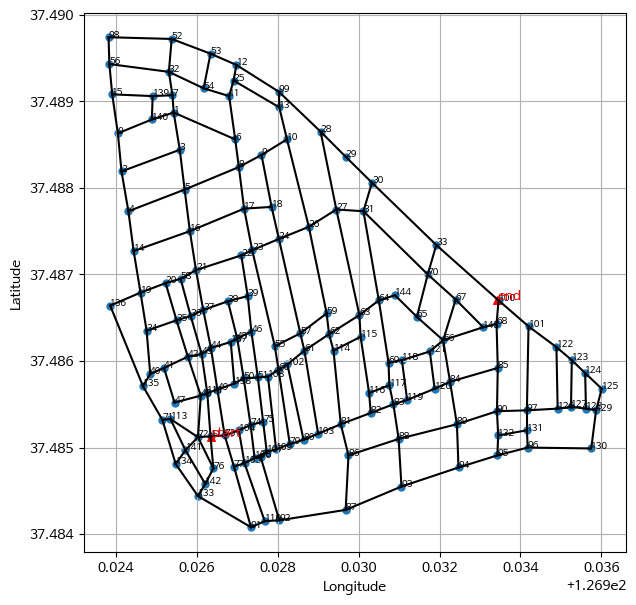

In [217]:
dept_loc = '서울특별시 관악구 관천로22길 43' # 해달별어린이집
dest_loc = '서울 관악구 신림로 344 SK허브그린' # 뚜레주르

dept_loc = '서울 관악구 관천로10길 11-07' # 빌라
dest_loc = '서울특별시 관악구 신림동 봉천로 258' # 정비 서비스센터

path = BestPath(node, cost)
path.get_location(dept_loc, dest_loc)
path.visualize()

In [196]:
dist_w, dist_d, dist_path = path.best_path(cost.dist)
cost_w, cost_d, cost_path = path.best_path(cost.cost_mat)
user_w, user_d, user_path = path.best_path(cost.user_mat)

[13.838675373464671, 12.994326205643121, 13.082665631432835, 12.238316463611286] [[112, 73, 77, 105, 106, 107, 109, 79, 80, 103, 81, 82, 83, 119, 120, 84, 85, 68, 100], [112, 73, 77, 105, 106, 107, 109, 79, 80, 103, 81, 82, 83, 119, 120, 84, 85, 68], [73, 77, 105, 106, 107, 109, 79, 80, 103, 81, 82, 83, 119, 120, 84, 85, 68, 100], [73, 77, 105, 106, 107, 109, 79, 80, 103, 81, 82, 83, 119, 120, 84, 85, 68]]
[9.12481628053274, 8.64905616639342, 8.368806538500904, 7.893046424361585] [[112, 73, 77, 91, 110, 92, 87, 93, 94, 89, 90, 97, 101, 100], [112, 73, 77, 91, 110, 92, 87, 93, 94, 89, 90, 85, 68], [73, 77, 91, 110, 92, 87, 93, 94, 89, 90, 97, 101, 100], [73, 77, 91, 110, 92, 87, 93, 94, 89, 90, 85, 68]]
[10.109682834939468, 9.265333667117918, 9.35367309290763, 8.50932392508608] [[112, 73, 104, 105, 110, 92, 87, 86, 88, 89, 90, 85, 68, 100], [112, 73, 104, 105, 110, 92, 87, 86, 88, 89, 90, 85, 68], [73, 104, 105, 110, 92, 87, 86, 88, 89, 90, 85, 68, 100], [73, 104, 105, 110, 92, 87, 86, 

### DFS

12.2383 691.1347 [73, 77, 105, 106, 107, 109, 79, 80, 103, 81, 82, 83, 119, 120, 84, 85, 68]


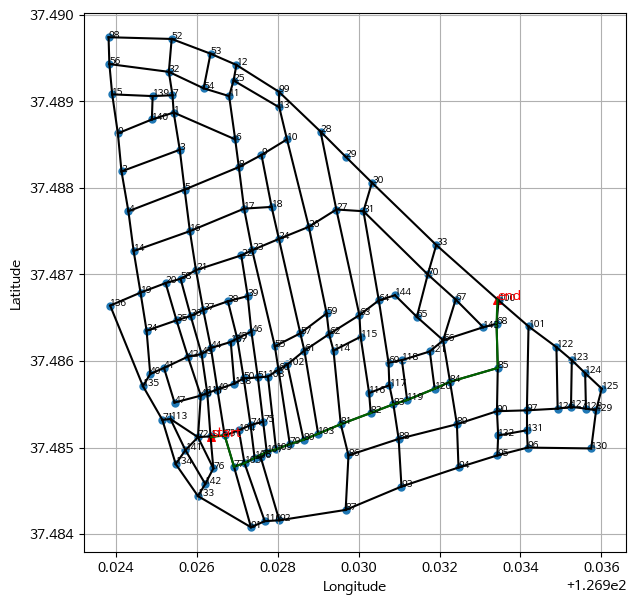

In [197]:
## 거리 순 경로
print(round(dist_w,4), round(dist_d,4), dist_path)
path.visualize(dist_path)

7.893 848.4286 [73, 77, 91, 110, 92, 87, 93, 94, 89, 90, 85, 68]


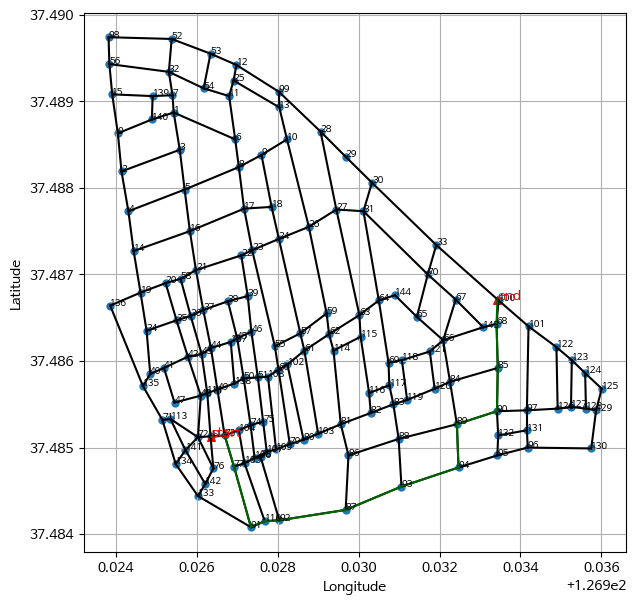

In [198]:
## cost 순 경로
print(round(cost_w,4), round(cost_d,4), cost_path)
path.visualize(cost_path)

8.5093 850.8454 [73, 104, 105, 110, 92, 87, 86, 88, 89, 90, 85, 68]


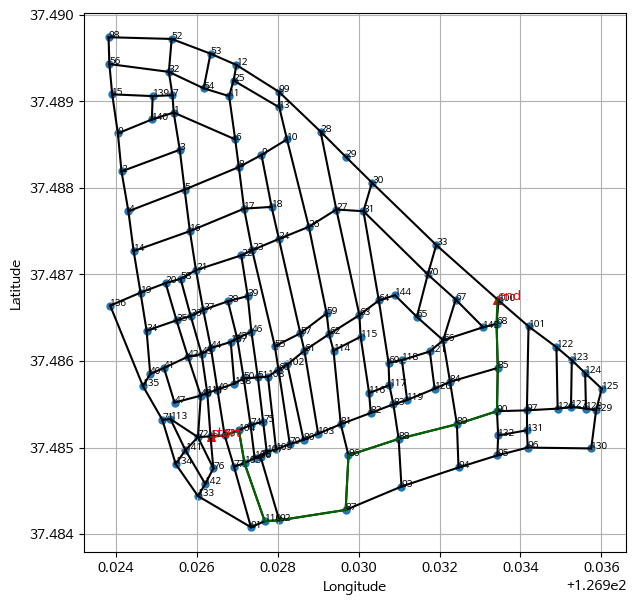

In [199]:
## user cost 순 경로
print(round(user_w,4), round(user_d,4), user_path)
path.visualize(user_path)

### 시각화

In [296]:
path.visualize_map([])

In [218]:
path.visualize_map(dist_path)

In [220]:
path.visualize_map(cost_path)

In [221]:
path.visualize_map(user_path)

# 7_Clustering

## 1 사용자 선호 기반 위험거리 분류
사용자 데이터가 없기 때문에 랜덤값 생성해서 데이터 생성

In [222]:
ind = [str_light, sec_light, cctv, bell, police, pub, accm, hum_act]
col = ['str_light', 'sec_light', 'cctv', 'bell', 'police', 'pub', 'accm', 'hum_act']

In [223]:
origin_df = pd.DataFrame()

for c, mat in zip(col, ind):
  value = []
  for i in range(n_node):
    for j in edge[i]:
      value.append(mat[i,j])
  origin_df[c] = value

print(origin_df.shape)

(477, 8)


In [224]:
np.random.seed(seed=100)
cluster_df = origin_df.copy()
cluster_df['selection'] = np.random.normal(0, 1, len(cluster_df))

scaler = MinMaxScaler()
cluster_df[col+['selection']] = scaler.fit_transform(cluster_df[col+['selection']])
cluster_df.head()

str_light  sec_light      cctv      bell  police       pub      accm  \
0   0.000000   0.039604  0.162288  0.060000     1.0  0.200450  0.000000   
1   0.283804   0.042084  0.175584  0.121718     1.0  0.000000  0.000000   
2   0.000000   0.023532  0.084375  0.000000     1.0  0.208432  0.000000   
3   0.000000   0.130202  0.074695  0.138079     0.0  0.000000  0.444785   
4   0.510061   0.096262  0.103545  0.191411     1.0  0.213156  0.000000   

    hum_act  selection  
0  0.095668   0.190035  
1  0.070397   0.515023  
2  0.093863   0.640883  
3  0.110108   0.422592  
4  0.086643   0.614213

In [225]:
# 하위 30%의 거리 취약거리로 선정
cluster_df = cluster_df[cluster_df['selection'] < 0.3]
select_df = origin_df.loc[cluster_df.index]
cluster_df.shape

(83, 9)

## 범죄 위험도 지표 기준 클러스터링

In [226]:
# 군집 변수
col

['str_light', 'sec_light', 'cctv', 'bell', 'police', 'pub', 'accm', 'hum_act']

### 계층적 군집분석 완전 연결법

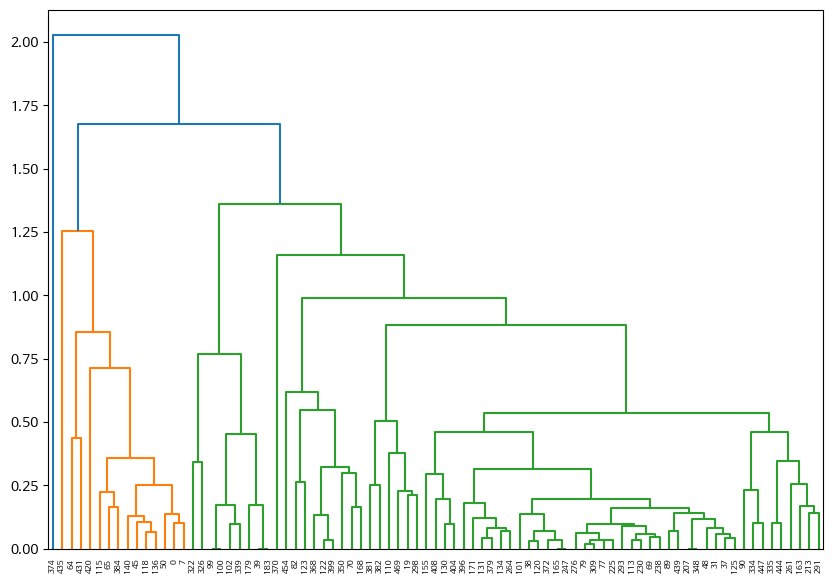

In [227]:
# 필요한 라이브러리를 불러오기.
from sklearn.preprocessing import *
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

clust_df = cluster_df[col]

# 계층적 군집화를 수행합니다.
cluster = AgglomerativeClustering(affinity='euclidean', linkage='complete')
cluster_result = cluster.fit_predict(clust_df)

select_df['complete_linkage'] = cluster_result
cluster_df['complete_linkage'] = cluster_result

# 덴드로그램을 그립니다.
linked = linkage(clust_df, 'complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=clust_df.index.tolist())
plt.show()

### 계층적 군집분석 와드 연결법

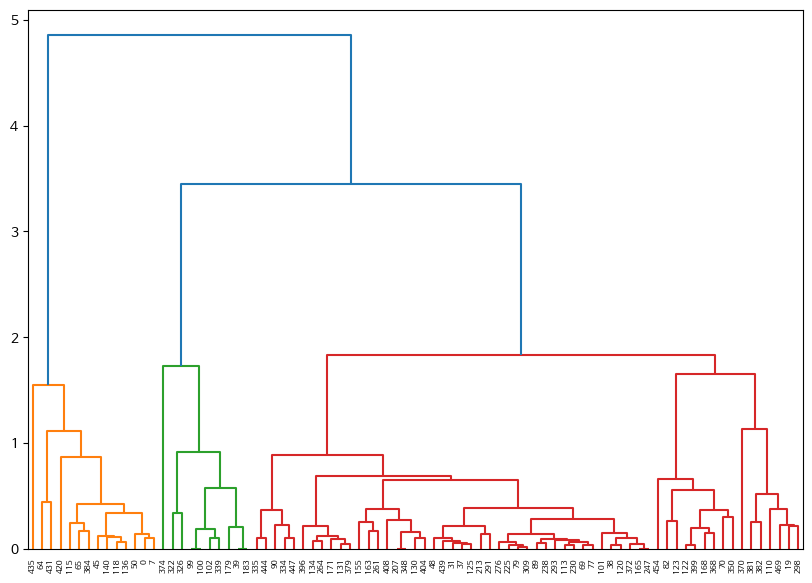

In [228]:
# 계층적 군집화를 수행합니다.
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
cluster_result = cluster.fit_predict(clust_df)

select_df['ward_linkage'] = cluster_result
cluster_df['ward_linkage'] = cluster_result

# 덴드로그램을 그립니다.
linked = linkage(clust_df, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=clust_df.index.tolist())
plt.show()

### 비계층적 군집분석 K-Means

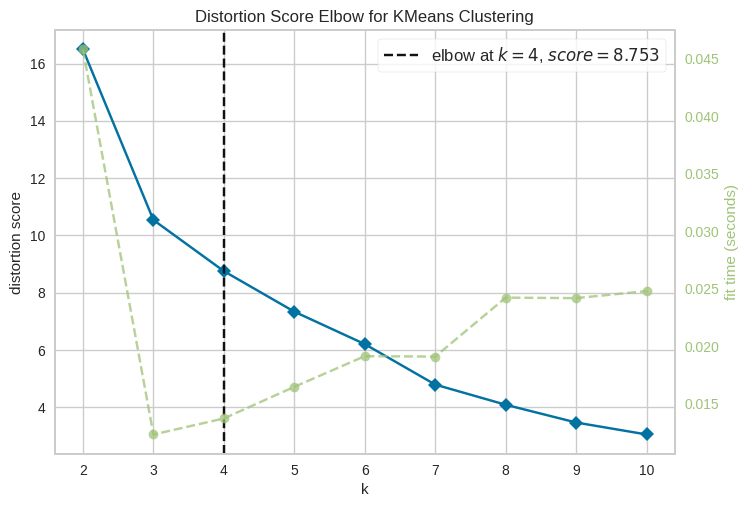

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [229]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(clust_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [230]:
# K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_result = kmeans.fit_predict(clust_df)
select_df['kmeans'] = kmeans_result
cluster_df['kmeans'] = kmeans_result

### 비계층적 군집분석 K-Medoids

In [231]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.7 MB/s eta 0:00:00


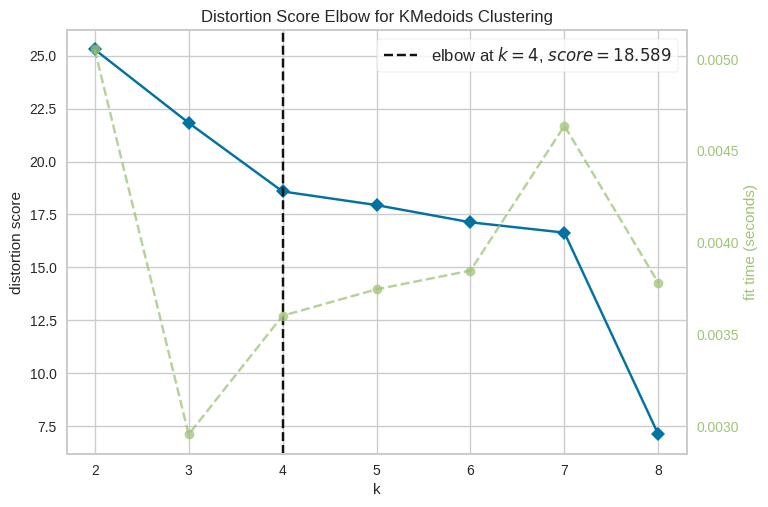

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [232]:
from sklearn_extra.cluster import KMedoids
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(2,9))

visualizer.fit(clust_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [233]:
# K-medois Clustering
kmedoids = KMedoids(n_clusters=4, random_state=0)
Kmedoids_result = kmedoids.fit_predict(clust_df)
select_df['kmedoids'] = Kmedoids_result
cluster_df['kmedoids'] = Kmedoids_result

## 하드보팅

In [234]:
select_df.describe()

str_light  sec_light       cctv       bell     police        pub  \
count  83.000000  83.000000  83.000000  83.000000  83.000000  83.000000   
mean    0.006462   0.475375   0.208775   0.033183   3.168675   0.009035   
std     0.035007   0.530276   0.205541   0.045050   0.376741   0.016890   
min     0.000000   0.017497   0.000000   0.000000   3.000000   0.000000   
25%     0.000000   0.142785   0.063131   0.000000   3.000000   0.000000   
50%     0.000000   0.304677   0.148262   0.017706   3.000000   0.000000   
75%     0.000000   0.569601   0.294702   0.056626   3.000000   0.016081   
max     0.303177   3.429365   1.195558   0.251697   4.000000   0.073059   

            accm    hum_act  complete_linkage  ward_linkage     kmeans  \
count  83.000000  83.000000         83.000000     83.000000  83.000000   
mean    0.015074  12.515663          0.012048      0.168675   2.036145   
std     0.028468  15.574177          0.109764      0.376741   1.183688   
min     0.000000   0.600000          0.000000      0.000000   0.000000   
25%     0.000000   4.900000          0.000000      0.000000   1.000000   
50%     0.000000   5.500000          0.000000      0.000000   3.000000   
75%     0.022683   7.300000          0.000000      0.000000   3.000000   
max     0.194493  55.900000          1.000000      1.000000   3.000000   

        kmedoids  
count  83.000000  
mean    2.108434  
std     1.137091  
min     0.000000  
25%     1.000000  
50%     3.000000  
75%     3.000000  
max     3.000000

In [235]:
cluster_name = ('complete_linkage', 'ward_linkage', 'kmeans', 'kmedoids')

In [236]:
for c in cluster_name:
  print(c)
  print(select_df[c].value_counts())
  print('')

complete_linkage
0    82
1     1
Name: complete_linkage, dtype: int64

ward_linkage
0    69
1    14
Name: ward_linkage, dtype: int64

kmeans
3    45
0    14
1    14
2    10
Name: kmeans, dtype: int64

kmedoids
3    47
1    16
0    11
2     9
Name: kmedoids, dtype: int64



In [237]:
for c in cluster_name:
  d = select_df.groupby(c, as_index=False)[col].mean()
  display(d)
  print('')

complete_linkage  str_light  sec_light      cctv      bell    police  \
0                 0   0.006541   0.439351  0.196741  0.030519  3.170732   
1                 1   0.000000   3.429365  1.195558  0.251697  3.000000   

        pub      accm    hum_act  
0  0.008762  0.015258  12.139024  
1  0.031462  0.000000  43.400000

ward_linkage  str_light  sec_light      cctv      bell  police       pub  \
0             0   0.001785   0.493970  0.204628  0.031551     3.0  0.009599   
1             1   0.029509   0.383726  0.229214  0.041231     4.0  0.006255   

       accm    hum_act  
0  0.015659  12.936232  
1  0.012192  10.442857

kmeans  str_light  sec_light      cctv      bell  police       pub  \
0       0   0.029509   0.383726  0.229214  0.041231     4.0  0.006255   
1       1   0.008800   0.898564  0.420745  0.076935     3.0  0.005773   
2       2   0.000000   0.966529  0.383360  0.064663     3.0  0.017479   
3       3   0.000000   0.263084  0.097674  0.010073     3.0  0.009039   

       accm    hum_act  
0  0.012192  10.442857  
1  0.035840   8.585714  
2  0.001950  50.040000  
3  0.012427   6.044444

kmedoids  str_light  sec_light      cctv      bell    police       pub  \
0         0   0.027562   0.664392  0.295968  0.041153  3.181818  0.014998   
1         1   0.000511   0.604757  0.268355  0.051953  3.125000  0.007517   
2         2   0.023739   1.442250  0.654204  0.112999  3.222222  0.008898   
3         3   0.000241   0.201946  0.082791  0.009645  3.170213  0.008183   

       accm    hum_act  
0  0.007022  48.854545  
1  0.022349   6.625000  
2  0.043597  12.944444  
3  0.009021   5.934043

In [239]:
def scoring(c, neg_col, col):
  df = cluster_df.groupby(c, as_index=False)[col].mean()
  score = []
  for i, row in df.iterrows():
    s = 0
    for column in col:
      if column in neg_col:
        s += row[column]
      else:
        s += (1- row[column])
    score.append(round(s/len(col) * 100, 2))

  return score

In [240]:
worst = []
for c in cluster_name:
  print(c)
  d = scoring(c, ('pub','accm'), col)
  d = pd.DataFrame(data = {'score':d})
  display(d)
  worst.append(d[d['score'] == max(d['score'])].index[0])
  print('')
print(worst)

complete_linkage


score
0  66.91
1  34.65


ward_linkage


score
0  68.86
1  55.04


kmeans


score
0  55.04
1  64.42
2  56.13
3  73.06


kmedoids


score
0  55.87
1  66.92
2  54.99
3  71.09


[0, 0, 3, 3]


In [241]:
for i in range(4):
  c, wst = cluster_name[i], worst[i]
  cluster_df[c] = [1 if i==wst else 0 for i in cluster_df[c]]

cluster_df['hard_votting'] = 0
for c in cluster_name:
  cluster_df['hard_votting'] += cluster_df[c]
cluster_df['hard_votting'].value_counts()

4    39
2    31
1     7
3     6
Name: hard_votting, dtype: int64

In [242]:
index_df = pd.DataFrame()

for c, mat in zip(col, ind):
  value, st, ed = [], [], []
  for i in range(n_node):
    for j in edge[i]:
      value.append(mat[i,j])
      st.append(i)
      ed.append(j)
  index_df['start'] = st
  index_df['end'] = ed
  index_df[c] = value

print(index_df.shape)
index_df.head()

(477, 10)


start  end  str_light  sec_light      cctv      bell  police       pub  \
0      0   15   0.000000   0.135817  0.194025  0.019402     4.0  0.019402   
1      0  140   0.091841   0.144321  0.209921  0.039360     4.0  0.000000   
2      0    2   0.000000   0.080700  0.100876  0.000000     4.0  0.020175   
3      1    7   0.000000   0.446509  0.089302  0.044651     3.0  0.000000   
4      1  140   0.165059   0.330117  0.123794  0.061897     4.0  0.020632   

       accm  hum_act  
0  0.000000      5.8  
1  0.000000      4.4  
2  0.000000      5.7  
3  0.133953      6.6  
4  0.000000      5.3

In [243]:
clust_col = list(cluster_name)+['hard_votting']
index_df = pd.concat([index_df, cluster_df[clust_col]], axis=1)
index_df.head()

start  end  str_light  sec_light      cctv      bell  police       pub  \
0      0   15   0.000000   0.135817  0.194025  0.019402     4.0  0.019402   
1      0  140   0.091841   0.144321  0.209921  0.039360     4.0  0.000000   
2      0    2   0.000000   0.080700  0.100876  0.000000     4.0  0.020175   
3      1    7   0.000000   0.446509  0.089302  0.044651     3.0  0.000000   
4      1  140   0.165059   0.330117  0.123794  0.061897     4.0  0.020632   

       accm  hum_act  complete_linkage  ward_linkage  kmeans  kmedoids  \
0  0.000000      5.8               1.0           0.0     0.0       1.0   
1  0.000000      4.4               NaN           NaN     NaN       NaN   
2  0.000000      5.7               NaN           NaN     NaN       NaN   
3  0.133953      6.6               NaN           NaN     NaN       NaN   
4  0.000000      5.3               NaN           NaN     NaN       NaN   

   hard_votting  
0           2.0  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [244]:
index_df['worst'] = [1 if v in range(5) else 0 for v in index_df['hard_votting']]
index_df['worst'].value_counts()

0    394
1     83
Name: worst, dtype: int64

In [245]:
len(index_df.loc[index_df['hard_votting']==4])

39

In [246]:
index_df[col].describe()

str_light   sec_light        cctv        bell      police         pub  \
count  477.000000  477.000000  477.000000  477.000000  477.000000  477.000000   
mean     0.008507    0.410340    0.192161    0.030091    3.176101    0.007832   
std      0.035073    0.454614    0.198363    0.045605    0.381306    0.016483   
min      0.000000    0.000000    0.000000    0.000000    3.000000    0.000000   
25%      0.000000    0.108854    0.053086    0.000000    3.000000    0.000000   
50%      0.000000    0.259170    0.127713    0.016269    3.000000    0.000000   
75%      0.000000    0.534708    0.264716    0.039434    3.000000    0.009467   
max      0.323605    3.429365    1.195558    0.323373    4.000000    0.096795   

             accm     hum_act  
count  477.000000  477.000000  
mean     0.017767   10.281761  
std      0.037038   12.776310  
min      0.000000    0.500000  
25%      0.000000    4.800000  
50%      0.000000    5.300000  
75%      0.021040    7.100000  
max      0.301163   55.900000

In [247]:
index_df.loc[index_df['hard_votting']==4][col].describe()

str_light  sec_light       cctv       bell  police        pub  \
count       39.0  39.000000  39.000000  39.000000    39.0  39.000000   
mean         0.0   0.211299   0.078061   0.008348     3.0   0.008556   
std          0.0   0.163445   0.051188   0.012720     0.0   0.016488   
min          0.0   0.017497   0.000000   0.000000     3.0   0.000000   
25%          0.0   0.123947   0.037539   0.000000     3.0   0.000000   
50%          0.0   0.173885   0.069050   0.000000     3.0   0.000000   
75%          0.0   0.296558   0.119148   0.017660     3.0   0.013655   
max          0.0   0.906087   0.179861   0.037870     3.0   0.064721   

            accm    hum_act  
count  39.000000  39.000000  
mean    0.010359   6.143590  
std     0.016393   4.476653  
min     0.000000   3.000000  
25%     0.000000   4.050000  
50%     0.000000   5.100000  
75%     0.018890   6.150000  
max     0.048654  25.100000

In [248]:
score = []
for i, row in cluster_df.iterrows():
  s = 0
  for column in col:
    if column in ('jujeom', 'sleep'):
      s += row[column]
    else:
      s += (1- row[column])
  score.append(round(s/len(col) * 100, 2))

print(score)

[80.52, 82.37, 87.99, 95.58, 96.53, 96.85, 74.44, 84.27, 96.45, 82.69, 66.93, 82.07, 97.41, 83.14, 98.16, 98.85, 80.83, 96.56, 93.69, 81.96, 81.96, 94.57, 85.31, 86.58, 97.71, 76.26, 86.04, 97.01, 89.66, 83.83, 95.97, 92.73, 96.06, 94.24, 84.76, 83.12, 89.95, 92.63, 97.57, 86.62, 95.56, 78.68, 74.44, 95.89, 93.22, 98.52, 97.63, 97.04, 97.57, 92.81, 94.57, 98.86, 92.74, 97.0, 90.3, 98.77, 80.88, 72.35, 92.19, 87.7, 82.98, 95.89, 84.74, 88.09, 70.22, 98.03, 51.53, 95.7, 82.86, 85.86, 80.86, 91.99, 89.98, 93.83, 91.06, 74.51, 66.31, 53.07, 95.07, 88.89, 92.79, 79.14, 89.02]


In [249]:
cluster_df['score'] = score
cluster_df[cluster_df['hard_votting']==4].sort_values(by='score', ascending=False)[col+['score']].head(10)

str_light  sec_light      cctv  bell  police  pub      accm   hum_act  \
276        0.0   0.005663  0.040613   0.0     0.0  0.0  0.000000  0.045126   
79         0.0   0.010967  0.012583   0.0     0.0  0.0  0.000000  0.068592   
309        0.0   0.020937  0.000000   0.0     0.0  0.0  0.000000  0.077617   
225        0.0   0.040541  0.000000   0.0     0.0  0.0  0.000000  0.077617   
77         0.0   0.031123  0.029758   0.0     0.0  0.0  0.000000  0.086643   
372        0.0   0.012271  0.008799   0.0     0.0  0.0  0.069863  0.066787   
113        0.0   0.062333  0.059599   0.0     0.0  0.0  0.000000  0.061372   
230        0.0   0.036817  0.075434   0.0     0.0  0.0  0.000000  0.077617   
165        0.0   0.037990  0.031135   0.0     0.0  0.0  0.061799  0.063177   
247        0.0   0.037990  0.031135   0.0     0.0  0.0  0.061799  0.063177   

     score  
276  98.86  
79   98.85  
309  98.77  
225  98.52  
77   98.16  
372  98.03  
113  97.71  
230  97.63  
165  97.57  
247  97.57

In [250]:
origin_df.loc[cluster_df[cluster_df['hard_votting']==4].sort_values(by='score', ascending=False).head(10).index]

str_light  sec_light      cctv  bell  police  pub      accm  hum_act
276        0.0   0.019422  0.048555   0.0     3.0  0.0  0.000000      3.0
79         0.0   0.037608  0.015043   0.0     3.0  0.0  0.000000      4.3
309        0.0   0.071801  0.000000   0.0     3.0  0.0  0.000000      4.8
225        0.0   0.139029  0.000000   0.0     3.0  0.0  0.000000      4.8
77         0.0   0.106733  0.035578   0.0     3.0  0.0  0.000000      5.3
372        0.0   0.042080  0.010520   0.0     3.0  0.0  0.021040      4.2
113        0.0   0.213763  0.071254   0.0     3.0  0.0  0.000000      3.9
230        0.0   0.126260  0.090185   0.0     3.0  0.0  0.000000      4.8
165        0.0   0.130281  0.037223   0.0     3.0  0.0  0.018612      4.0
247        0.0   0.130281  0.037223   0.0     3.0  0.0  0.018612      4.0

In [262]:
# 범죄 불안 지표 산출
for i in range(3):
  cost = []
  c, cor, wt = ('치안환경지수', '유해환경지수', '인구활동지수')[i], corr[i], w[i]
  for ind, row in regression_df.iterrows():
    value = row[c]
    cost.append(wt*value if cor > 0 else wt*(1 - value))
  regression_df[f'{c}_score'] = cost

In [269]:
regression_df['score'] = (regression_df['인구활동지수_score'] + regression_df['유해환경지수_score'] + regression_df['치안환경지수_score'])*100
origin_df['score'] = regression_df['score']
origin_df['start'] = regression_df['start']
origin_df['end'] = regression_df['end']
origin_df.head()

str_light  sec_light      cctv      bell  police       pub      accm  \
0   0.000000   0.135817  0.194025  0.019402     4.0  0.019402  0.000000   
1   0.091841   0.144321  0.209921  0.039360     4.0  0.000000  0.000000   
2   0.000000   0.080700  0.100876  0.000000     4.0  0.020175  0.000000   
3   0.000000   0.446509  0.089302  0.044651     3.0  0.000000  0.133953   
4   0.165059   0.330117  0.123794  0.061897     4.0  0.020632  0.000000   

   hum_act      score  start  end  
0      5.8  53.001089      0   15  
1      4.4  52.319663      0  140  
2      5.7  55.095195      0    2  
3      6.6  78.150844      1    7  
4      5.3  53.959110      1  140

In [264]:
prior_df = origin_df.loc[cluster_df[cluster_df['hard_votting']==4].index]
prior_df.sort_values(by='score', ascending=False).head()

str_light  sec_light      cctv      bell  police       pub      accm  \
396        0.0   0.331581  0.066316  0.022105     3.0  0.022105  0.044211   
469        0.0   0.179861  0.179861  0.000000     3.0  0.044965  0.044965   
120        0.0   0.056782  0.037854  0.000000     3.0  0.000000  0.037854   
171        0.0   0.056537  0.000000  0.000000     3.0  0.018846  0.018846   
131        0.0   0.134765  0.038504  0.000000     3.0  0.019252  0.000000   

     hum_act      score  start  end  
396      3.0  77.735125    117  116  
469      3.9  76.844293    142  133  
120      4.1  76.023257     35   42  
171      5.0  75.957250     50   45  
131      3.0  75.766287     38   45

In [267]:
print(f'우선 개선 거리: {prior_df.score.mean():.4f} / 전체 거리: {origin_df.score.mean():.4f}')

우선 개선 거리: 72.4007 / 전체 거리: 64.0495


In [276]:
worst_df = regression_df.loc[prior_df.index]
for i in ('도로밝기지수', '인구활동지수', '치안환경지수'):
  print(i)
  display(worst_df.sort_values(by=[i,'score'], ascending=[True, False])[['start','end','score', i]].head())
  print('')

도로밝기지수


start  end      score    도로밝기지수
38      11    6  74.637417  0.005102
276     80  102  74.428223  0.005663
79      23   55  73.977022  0.010967
372    109  108  75.406185  0.012271
171     50   45  75.957250  0.016486


인구활동지수


start  end      score    인구활동지수
396    117  116  77.735125  0.045126
131     38   45  75.766287  0.045126
276     80  102  74.428223  0.045126
207     61  102  74.220494  0.054152
348    102   61  74.220494  0.054152


치안환경지수


start  end      score    치안환경지수
171     50   45  75.957250  0.000000
225     65   66  73.841147  0.000000
309     89   94  73.841147  0.000000
372    109  108  75.406185  0.005560
79      23   55  73.977022  0.007951

In [278]:
display(worst_df.sort_values(by=['유해환경지수', 'score'], ascending=[False, False])[['start','end','score', '유해환경지수']].head())

start  end      score    유해환경지수
469    142  133  76.844293  0.238889
396    117  116  77.735125  0.176161
382    112   73  74.927309  0.171922
19       5   16  71.963365  0.145975
101     30   31  74.040394  0.129242

In [280]:
regression_df[col1].describe()

도로밝기지수      치안환경지수      유해환경지수      인구활동지수      범죄주의지수
count  477.000000  477.000000  477.000000  477.000000  477.000000
mean     0.122135    0.210548    0.068001    0.176566    0.423233
std      0.134055    0.238563    0.117510    0.230619    0.238834
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.032752    0.037579    0.000000    0.077617    0.235294
50%      0.075574    0.101368    0.021716    0.086643    0.411765
75%      0.159625    0.314218    0.092440    0.119134    0.529412
max      1.000000    1.000000    1.000000    1.000000    1.000000

## EDA

In [281]:
def index_visualization(c):
  import folium
  import branca.colormap as cm
  linear = cm.LinearColormap(['#fdf1f1','red'], vmin=0, vmax=max(index_df[c]))

  m = folium.Map(location=[37.487128, 126.926723], tiles='cartodbpositron', zoom_start=17)

  # node 추가하기
  for i, row in index_df.iterrows():
    loc = node.loc[row['start'], ['위도', '경도']], node.loc[row['end'], ['위도', '경도']]
    folium.PolyLine(locations = loc,
                    weight = 5,
                    opacity = .7,
                    color = linear(row[c])).add_to(m)
  m.add_child(linear)
  return m

In [282]:
print(col[0])
index_visualization(col[0])

str_light


In [283]:
print(col[1])
index_visualization(col[1])

sec_light


In [284]:
print(col[2])
index_visualization(col[2])

cctv


In [285]:
print(col[3])
index_visualization(col[3])

bell


In [286]:
print(col[4])
index_visualization(col[4])

police


In [287]:
print(col[5])
index_visualization(col[5])

pub


In [288]:
print(col[6])
index_visualization(col[6])

accm


## 시각화


In [289]:
def cluster_visualization(c):
  import folium
  import branca.colormap as cm
  max_v = index_df[c].nunique()-1
  linear = cm.LinearColormap(['#fdf1f1','red'], vmin=0, vmax=max_v)

  m = folium.Map(location=[37.487128, 126.926723], tiles='cartodbpositron', zoom_start=17)

  # node 추가하기
  for i, row in index_df.iterrows():
    if row[c] == max_v:
      loc = node.loc[row['start'], ['위도', '경도']], node.loc[row['end'], ['위도', '경도']]
      folium.PolyLine(locations = loc,
                      weight = 5,
                      opacity = .7,
                      color = linear(row[c])).add_to(m)
  m.add_child(linear)
  return m

In [290]:
cluster_visualization('worst')

In [291]:
cluster_visualization(cluster_name[0])

In [292]:
cluster_visualization(cluster_name[1])

In [293]:
cluster_visualization(cluster_name[2])

In [294]:
cluster_visualization(cluster_name[3])

In [295]:
cluster_visualization('hard_votting')